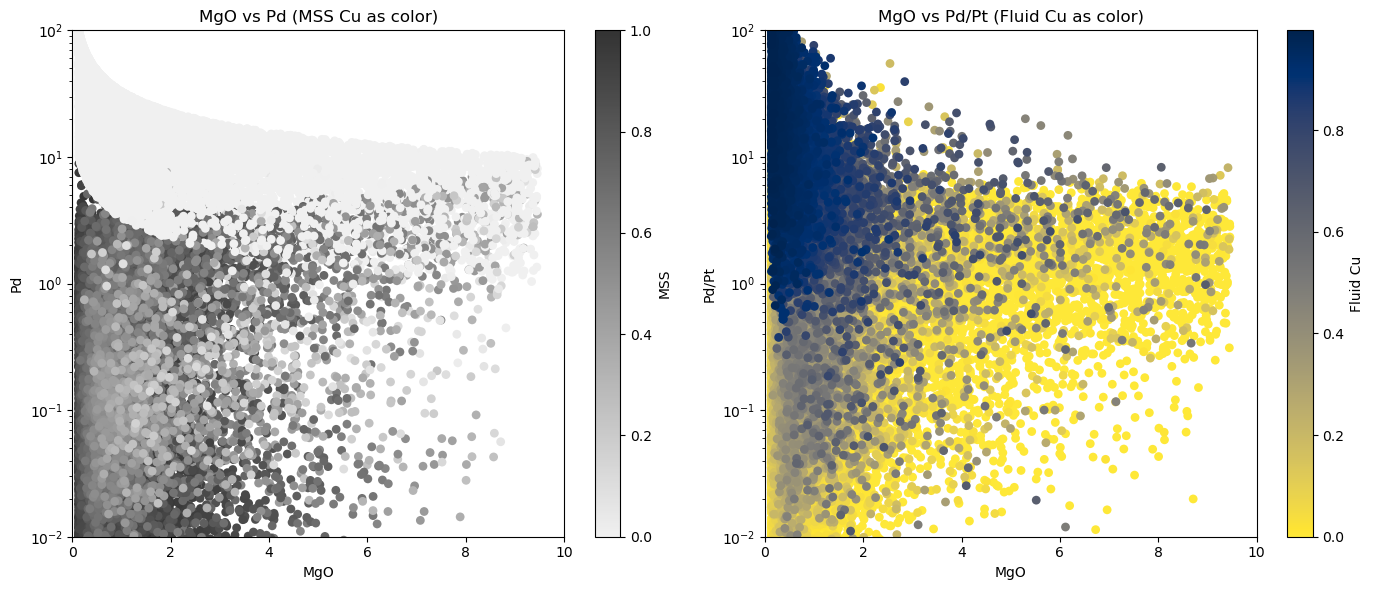

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

PGE_model = pd.read_csv('PGEs model results.csv')

cmap_grey = LinearSegmentedColormap.from_list('grey_cmap', ['#f0f0f0', '#333333'])

PGE_model_sorted = PGE_model.sort_values(by='Fluid Cu', ascending=True)
PGE_model_filtered = PGE_model_sorted[PGE_model_sorted['MgO'] != 9.4607720335]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(PGE_model_filtered['MgO'], PGE_model_filtered['Pd'], 
                     c=PGE_model_filtered['MSS Cu'], cmap=cmap_grey, s=40, marker='o', vmin=0, vmax=1, edgecolors='none', rasterized=True)
axs[0].set_xlabel('MgO')
axs[0].set_ylabel('Pd')
axs[0].set_title('MgO vs Pd (MSS Cu as color)')
axs[0].set_yscale('log')
axs[0].set_ylim([0.01, 100])
axs[0].set_xlim([0, 10])

cbar1 = fig.colorbar(sc1, ax=axs[0])
cbar1.set_label('MSS')

sc2 = axs[1].scatter(PGE_model_filtered['MgO'], PGE_model_filtered['Pd/Pt'], 
                     c=PGE_model_filtered['Fluid Cu'], cmap='cividis_r', s=40, marker='o', edgecolors='none', rasterized=True)
axs[1].set_xlabel('MgO')
axs[1].set_ylabel('Pd/Pt')
axs[1].set_title('MgO vs Pd/Pt (Fluid Cu as color)')
axs[1].set_yscale('log')
axs[1].set_ylim([0.01, 100])
axs[1].set_xlim([0, 10])

cbar2 = fig.colorbar(sc2, ax=axs[1])
cbar2.set_label('Fluid Cu')

fig.tight_layout()
fig.savefig('PGEs modelling results.svg', format='svg', dpi=1200)

plt.show()
